# Showwcase User Engagement Analysis
### Paul Steller

### Below is my analysis of the User Engagement data provided by Showwcase

# Part I: Locating Nulls, Something Fishy with session_duration, and Total Bugs

In [ ]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('showwcase_sessions.csv')

#### Let's take a look at our data

In [4]:
data

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,643880.0,51243.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0
299,933954.0,38459.0,10/1/19,True,False,False,False,False,1.0,0.0,0.0,0.0,0.0,306.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The last two rows are all null, so let's get rid of those

In [26]:
data = data.iloc[0:300]

In [27]:
#check for null values
data.isnull().sum().sum()

1

In [32]:
#find null
data[data.isnull().any(axis=1)]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0


#### This customer's session was only 95 seconds, so I believe it would be fair to set this null value to 0. 

In [50]:
data = data.fillna(0)

#### While looking through this customer's data. I noticed something strange

In [266]:
data[data['session_id'] == 558290.0 ][['customer_id','session_likes_given', 'session_duration', 'bugs_in_session']]

,customer_id,session_likes_given,session_duration,bugs_in_session
253,23404.0,13.0,27.0,2.0


#### The session duration was only 27 seconds, but during that time the customer gave 13 likes. That's some rapid fire "liking." Note, there were bugs in the session, which could possibly account for it. However, this instance made me decide to investigate other occurances of similarly suspicious activity.

In [69]:
data[data['session_likes_given']/data['session_duration'] >= 0.25]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
13,361637.0,51243.0,10/29/19,True,True,False,False,False,3.0,24.0,0.0,0.0,0.0,39.0
29,310751.0,40572.0,10/27/19,True,True,True,True,True,1.0,25.0,1.0,1107.0,3.0,32.0
62,74484.0,51243.0,10/24/19,False,True,True,False,False,0.0,20.0,5.0,0.0,0.0,10.0
253,558290.0,23404.0,10/5/19,False,True,False,False,True,0.0,13.0,0.0,0.0,2.0,27.0
263,266445.0,38459.0,10/5/19,True,True,False,False,False,2.0,27.0,0.0,0.0,0.0,61.0
274,84701.0,43086.0,10/4/19,False,True,False,False,False,0.0,26.0,0.0,0.0,0.0,11.0


#### There are 6 instances where the user gave out likes at a rate of $\textit{at least}$ 1 like per 4 seconds. In fact, there are two sessions where the user gave out likes at a rate of at least 2 likes per second (shown below).

In [68]:
data[data['session_likes_given']/data['session_duration'] >= 2]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
62,74484.0,51243.0,10/24/19,False,True,True,False,False,0.0,20.0,5.0,0.0,0.0,10.0
274,84701.0,43086.0,10/4/19,False,True,False,False,False,0.0,26.0,0.0,0.0,0.0,11.0


#### Note, there are no bugs logged for these last two sessions. It is certainly possible that the user logged in and liked 20 posts AND wrote 5 comments in the span of 10 seconds...but something seems fishy about that. Is it possible the session duration is incorrect? 
#### Let's look at all sessions with durations less than a minute.

In [75]:
data[data['session_duration'] < 60]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
13,361637.0,51243.0,10/29/19,True,True,False,False,False,3.0,24.0,0.0,0.0,0.0,39.0
29,310751.0,40572.0,10/27/19,True,True,True,True,True,1.0,25.0,1.0,1107.0,3.0,32.0
62,74484.0,51243.0,10/24/19,False,True,True,False,False,0.0,20.0,5.0,0.0,0.0,10.0
90,272981.0,10246.0,10/21/19,True,True,False,True,True,3.0,7.0,0.0,2120.0,2.0,53.0
112,95512.0,98653.0,10/20/19,True,True,True,False,False,1.0,2.0,4.0,0.0,0.0,55.0
133,861318.0,73524.0,10/18/19,True,True,False,True,False,3.0,5.0,0.0,1415.0,0.0,58.0
148,863765.0,12496.0,10/15/19,True,False,True,True,True,3.0,0.0,4.0,2126.0,4.0,41.0
253,558290.0,23404.0,10/5/19,False,True,False,False,True,0.0,13.0,0.0,0.0,2.0,27.0
274,84701.0,43086.0,10/4/19,False,True,False,False,False,0.0,26.0,0.0,0.0,0.0,11.0


#### Something definitely seems odd. In some of the sessions above, the user made multiple posts, likes, and comments, all in under a minute. It may be worth investigating further if some of the data is incorrect.

#### Finally, it is worth taking a look a the total number of bugs that occured each day. Although we could also use matplotlib or seaborn for visualization, Tableau typically looks better. Below, I am including an image of the Tableau graph, but I can provide the Tableau file if requested.

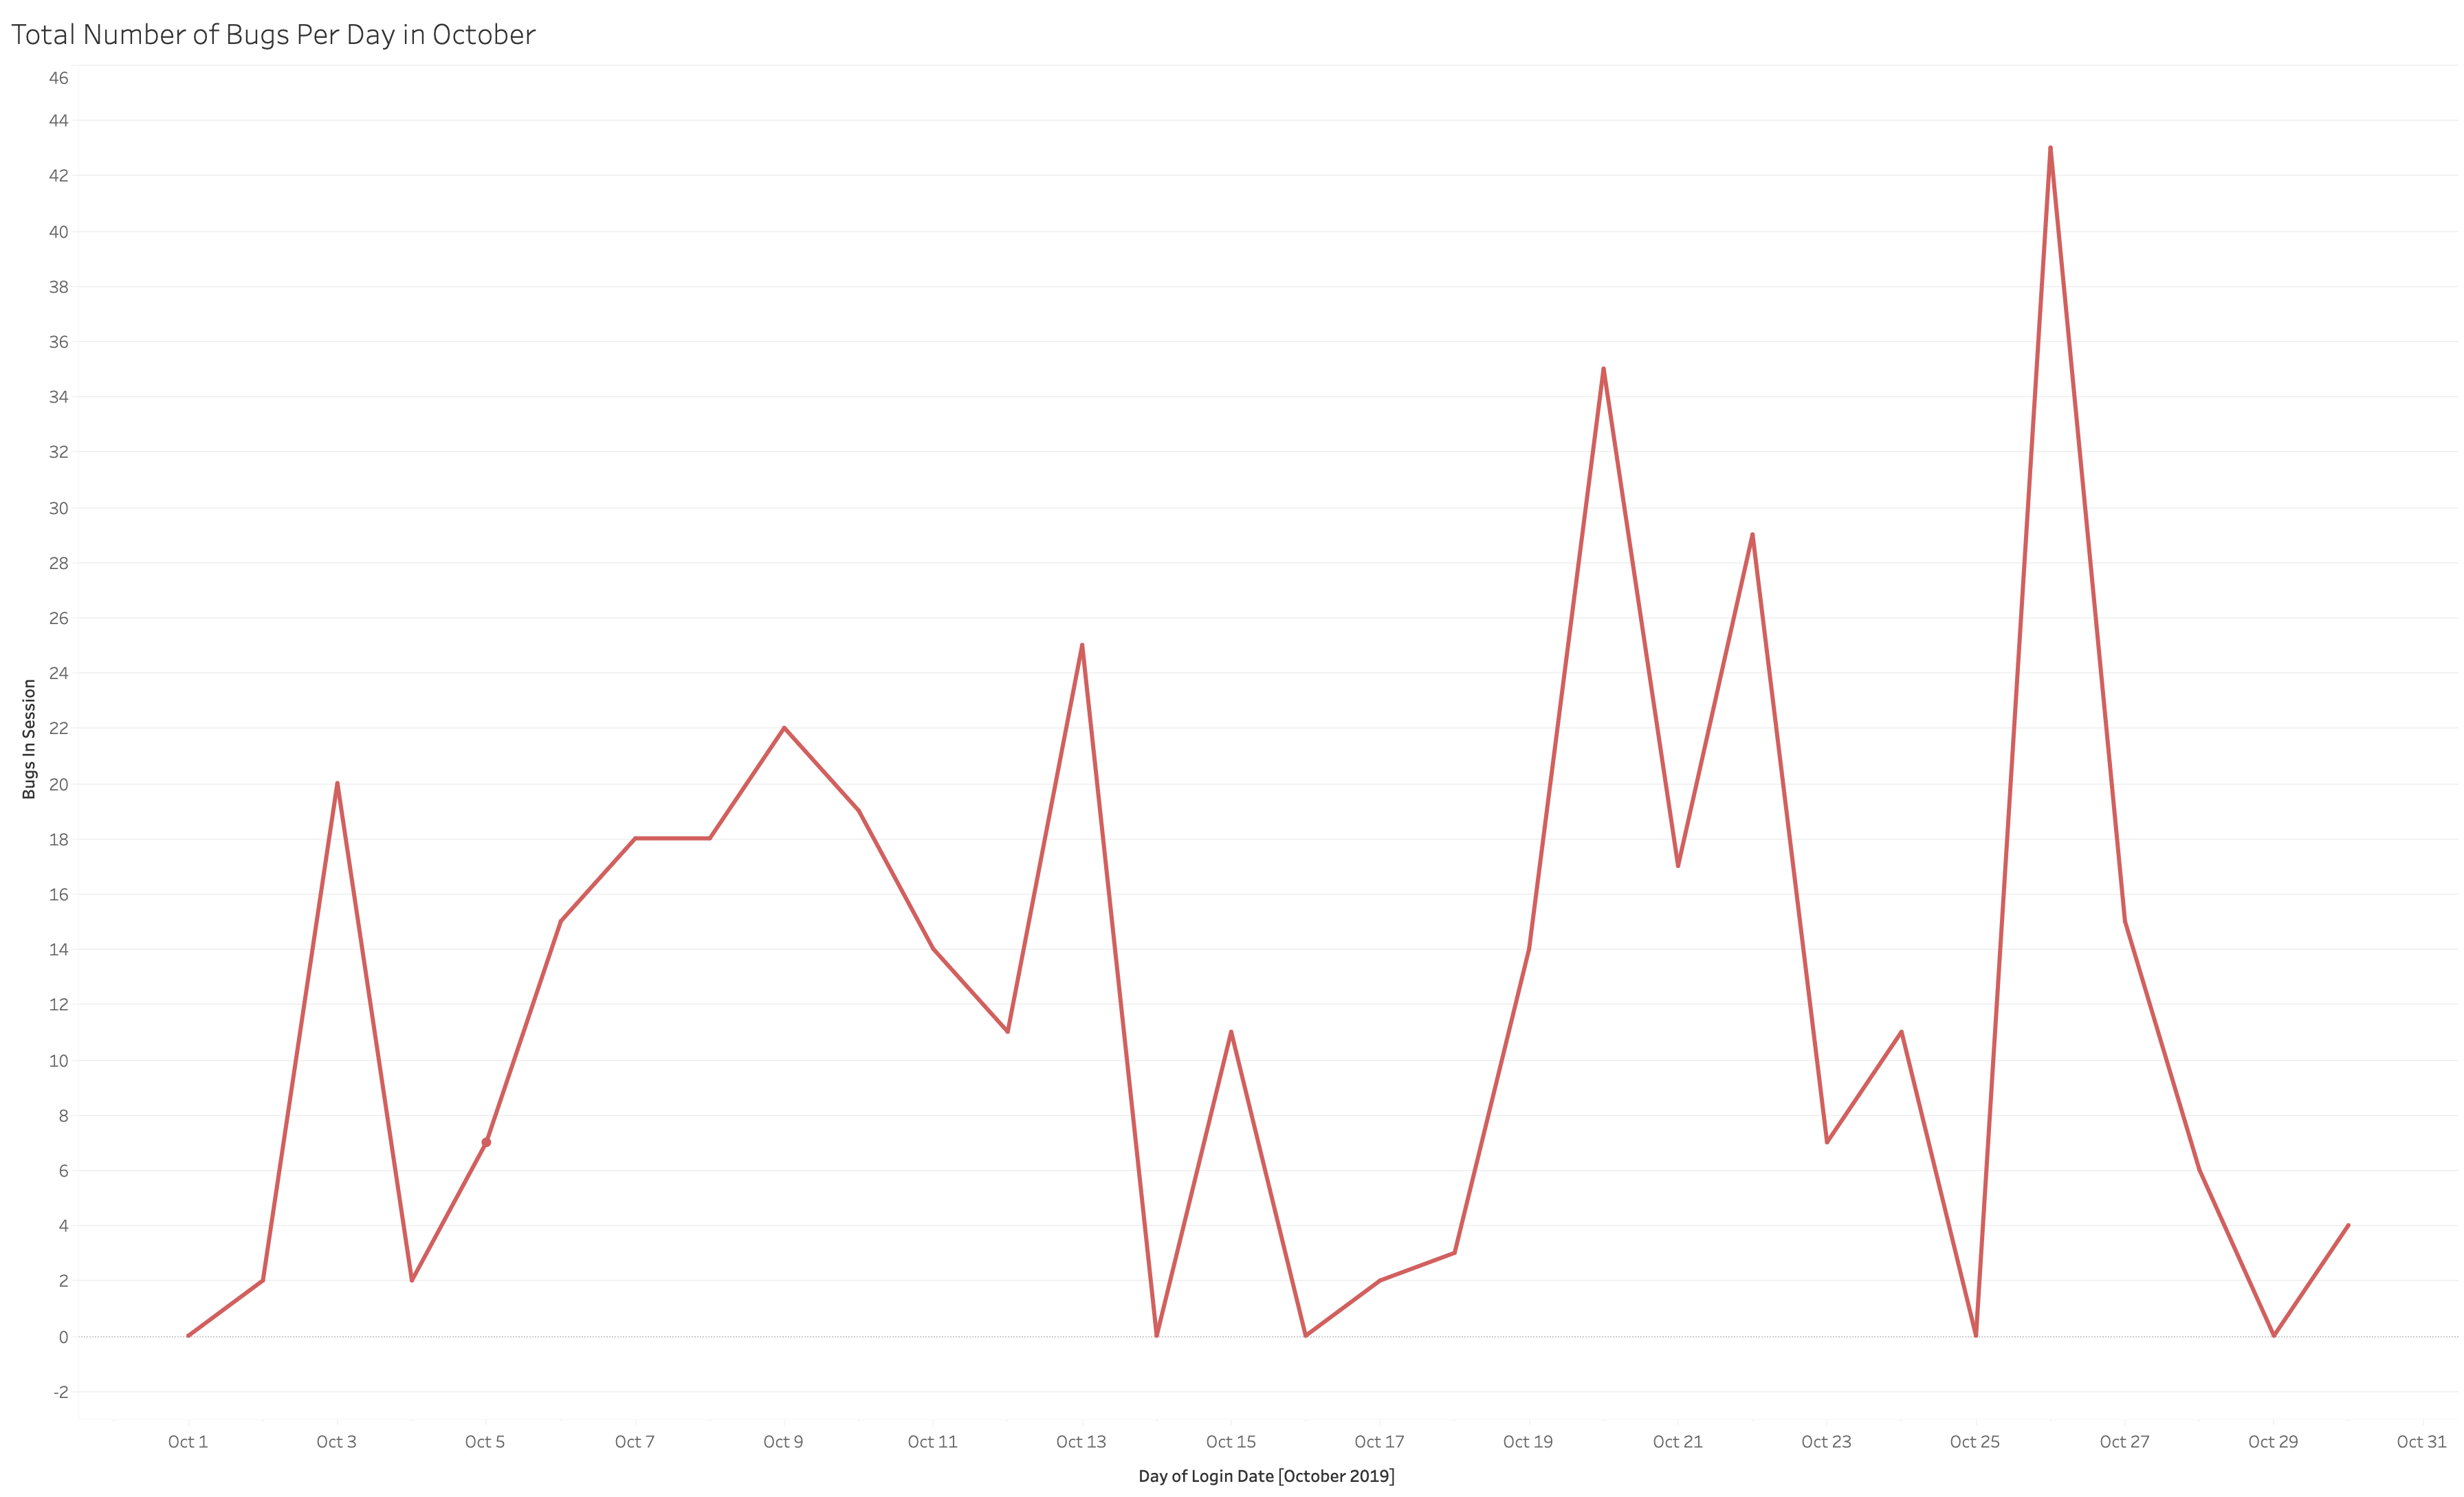

In [271]:
from IPython.display import Image
Image("tab1.png")

#### Although the total number of bugs fluctuates up and down over the course of the month, you can see that the peaks grow higher as the month progresses. In other words, when bugs $do$ occur later in the month, they are occuring with greater frequency. A reasonable explanation for this would be that, if there is more engagement as the month progresses, there may be more bugs. As we will see from the graphs in Part II, however, the user engagement doesn't seem to grow a significant amount over the course of the month. Therefore, the fact that bugs seem to be occuring in higher amounts as the month progresses is concerning, and an issue that should be addressed.

# Part II: General Trends in User Engagement

#### Below is the graph of the total number of logins by date.

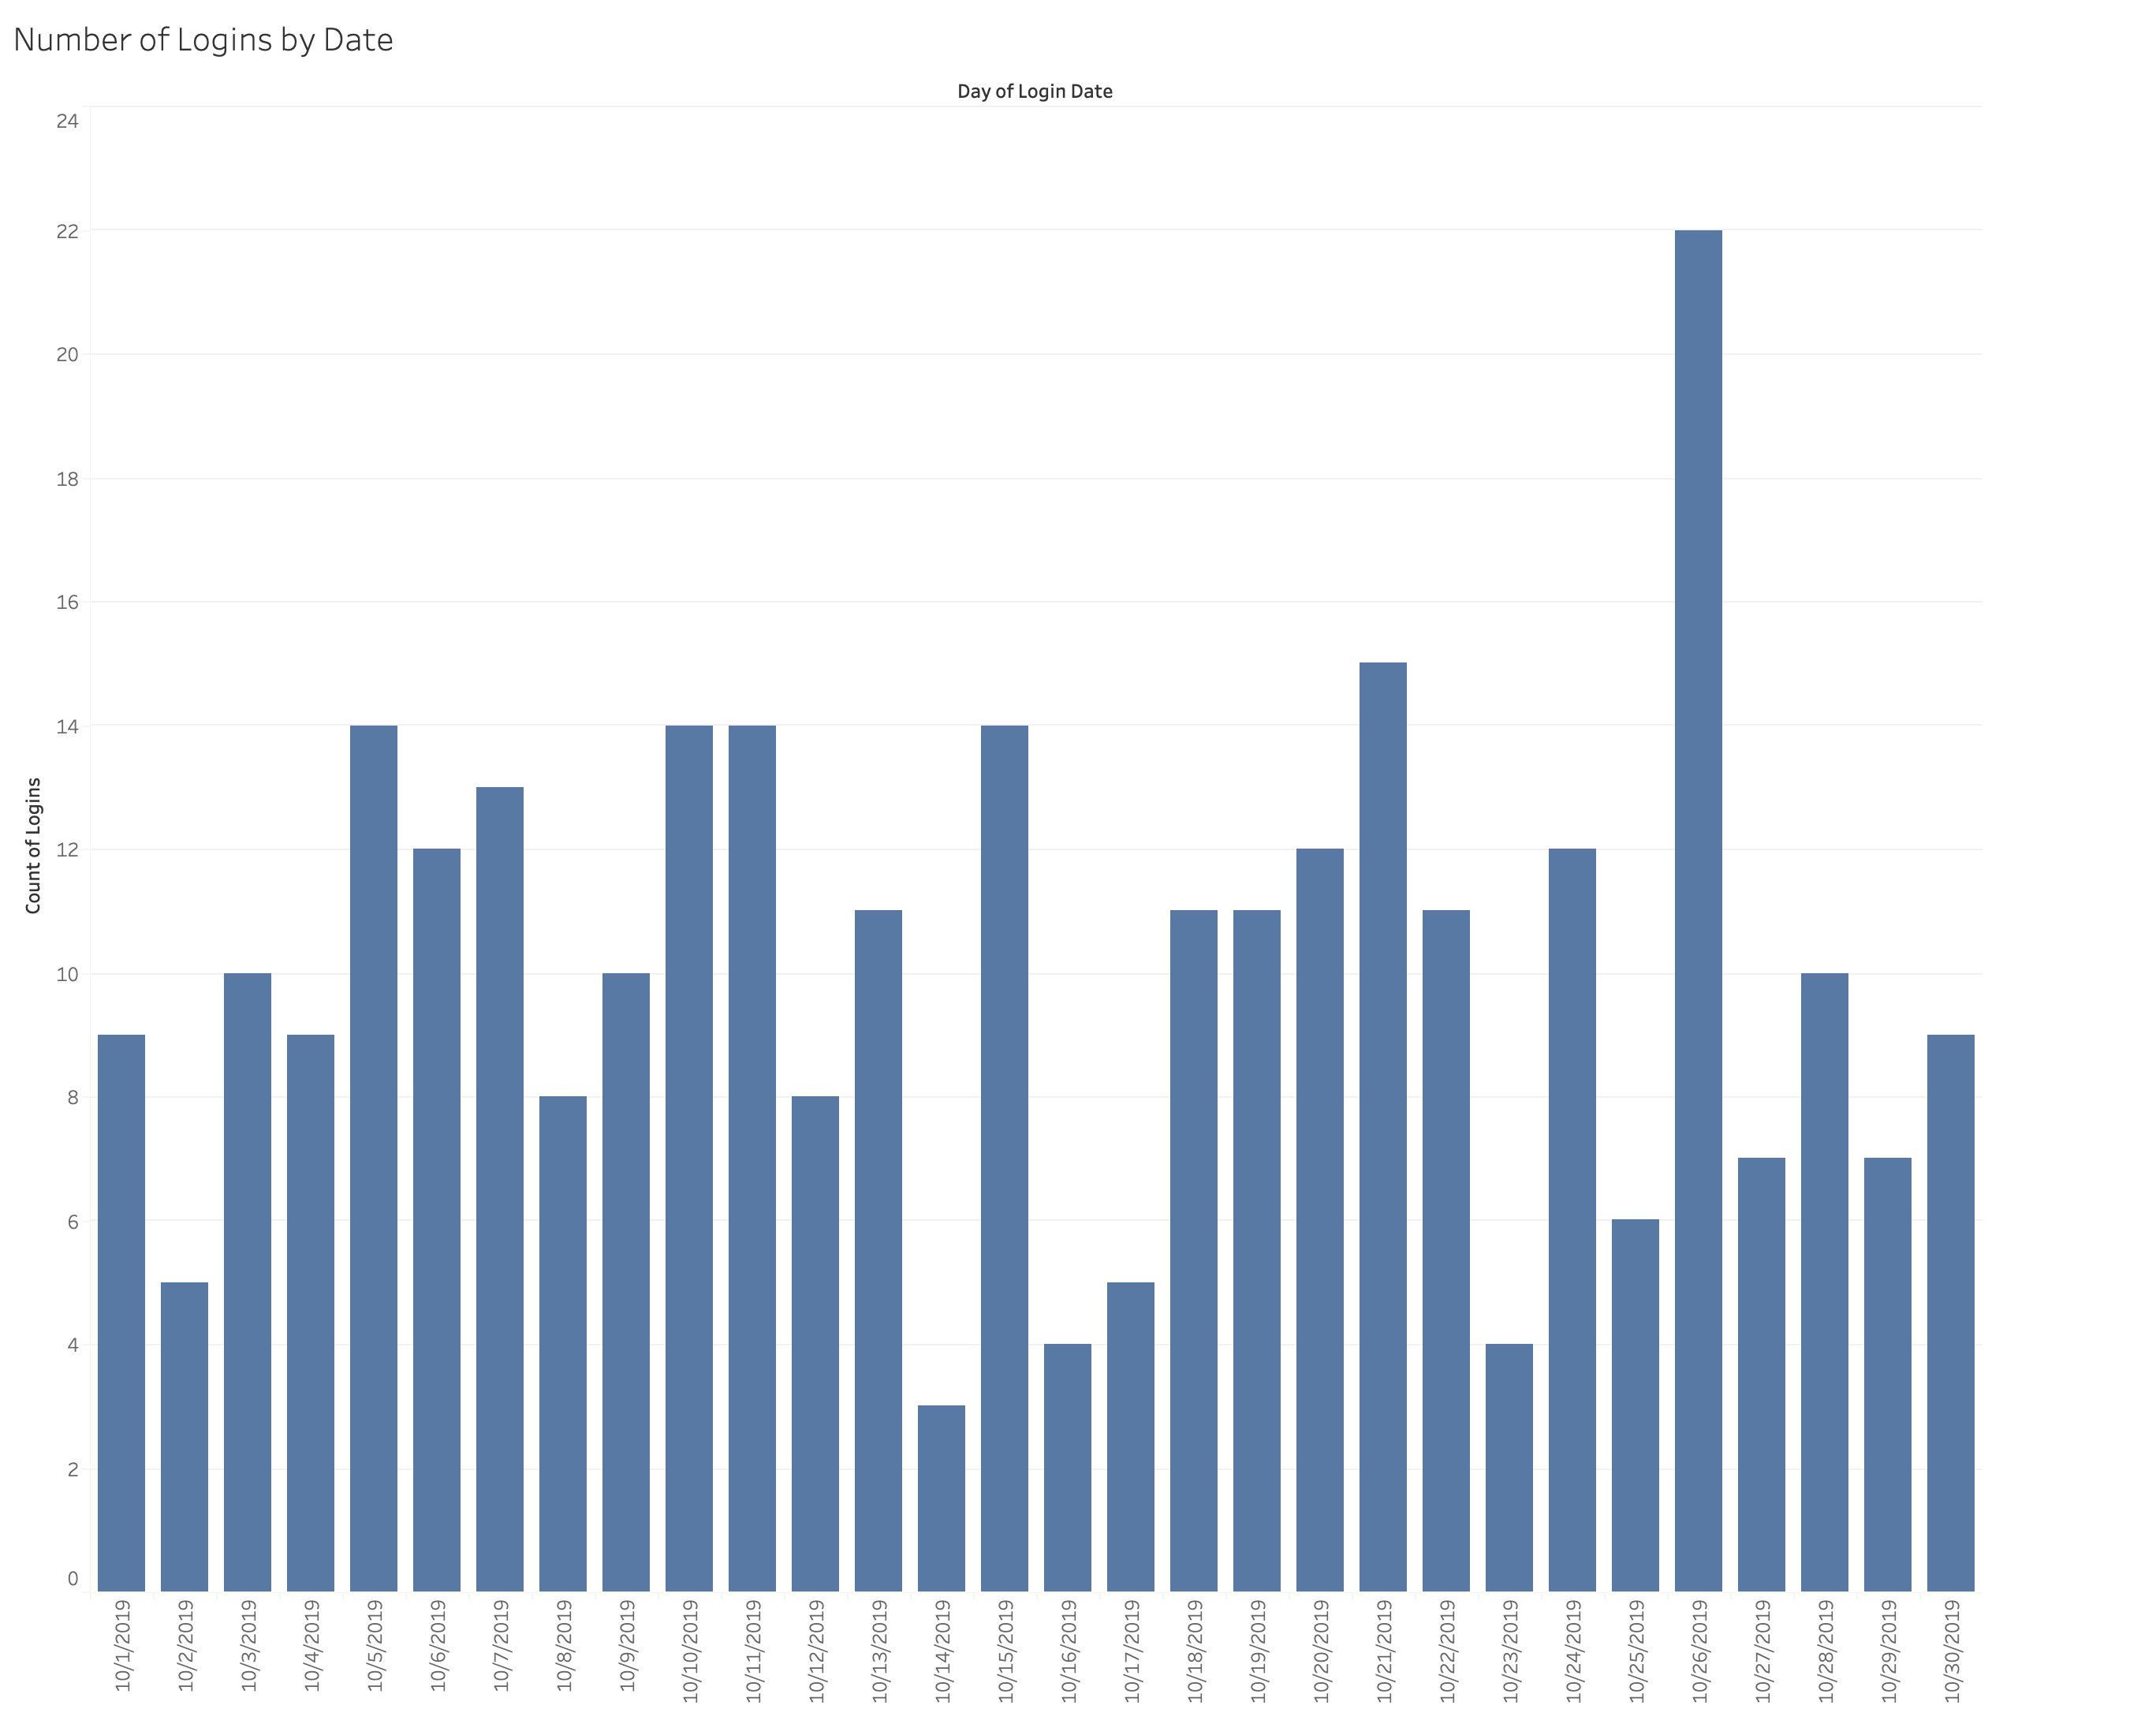

In [272]:
from IPython.display import Image
Image("tab2.png")

#### Some descriptive statistics for the number of daily logins in October

In [143]:
print(data['login_date'].value_counts().describe())
print('median:', data['login_date'].value_counts().median())

count    30.000000
mean     10.000000
std       4.042874
min       3.000000
25%       7.250000
50%      10.000000
75%      12.000000
max      22.000000
Name: login_date, dtype: float64
median: 10.0


#### From a visual inspection of the graph, it seems as though more logins occur during the weekends. Let's investigate.

In [127]:
weekends = ['10/4/19','10/5/19','10/6/19','10/11/19','10/12/19','10/13/19', '10/18/19','10/19/19','10/20/19','10/25/19','10/26/19','10/27/19']

In [128]:
weekend_data = data.copy()
weekday_data = data.copy()
for i in range(len(data)):
    if data.loc[i]['login_date'] in weekends:
        weekday_data = weekday_data.drop(i)
    else:
        weekend_data = weekend_data.drop(i)
    


In [135]:
#double check to make sure the weekend data only has the weekends
set(weekend_data['login_date']) == set(weekends)

True

In [265]:
print('Weekend Data:')
print()
print(weekend_data['login_date'].value_counts().describe())
print('median:', weekend_data['login_date'].value_counts().median())

Weekend Data:

count    12.000000
mean     11.416667
std       4.187825
min       6.000000
25%       8.750000
50%      11.000000
75%      12.500000
max      22.000000
Name: login_date, dtype: float64
median: 11.0


In [264]:
print('Weekday Data:')
print()
print(weekday_data['login_date'].value_counts().describe())
print('median:', weekday_data['login_date'].value_counts().median())

Weekday Data:

count    18.000000
mean      9.055556
std       3.764731
min       3.000000
25%       5.500000
50%       9.500000
75%      11.750000
max      15.000000
Name: login_date, dtype: float64
median: 9.5


#### So we can see that the there are $\textit{slightly}$ fewer logins during the week. But not by much.

#### Another way we could measure engagement is through the amount of time users spent on the site each day. I overlay the total daily session duration over the number of logins below to emphasize that these two values appear to be positively correlated to one anther. Thus, this doesn't seem to provide us with any new information.

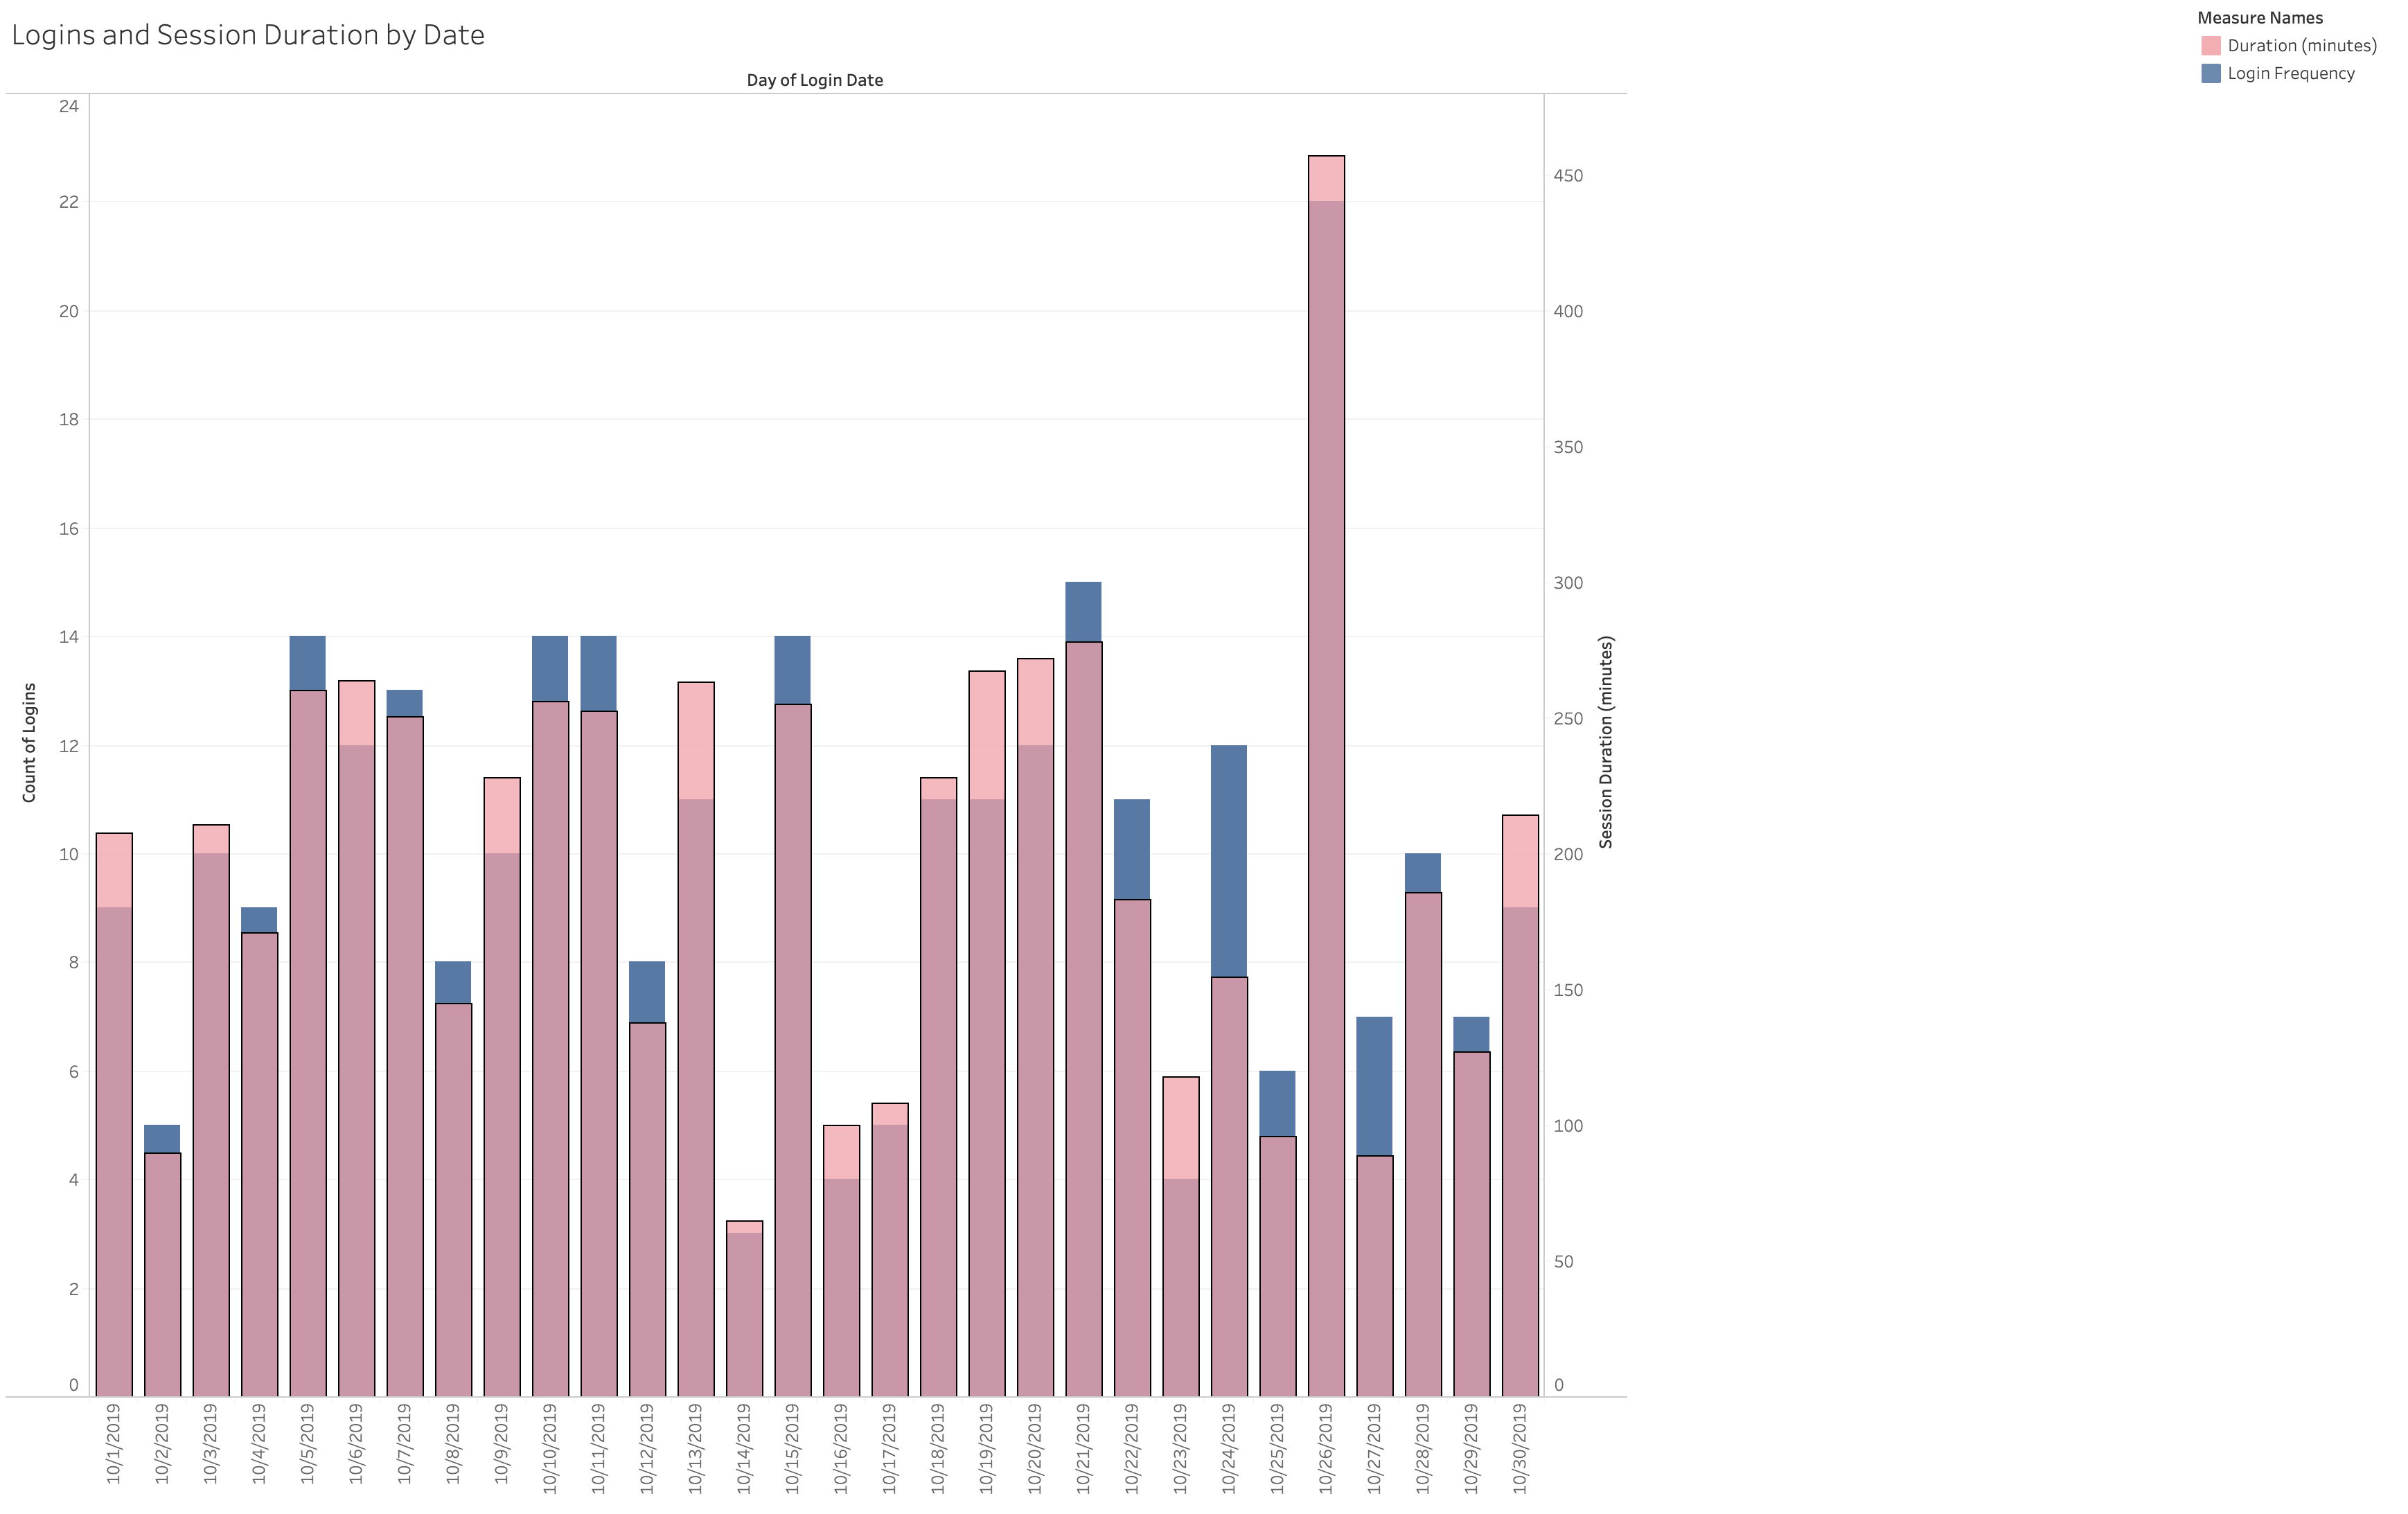

In [273]:
from IPython.display import Image
Image("tab3.png")

#### Next, let's look at the number of logins this month $\textit{by user}$

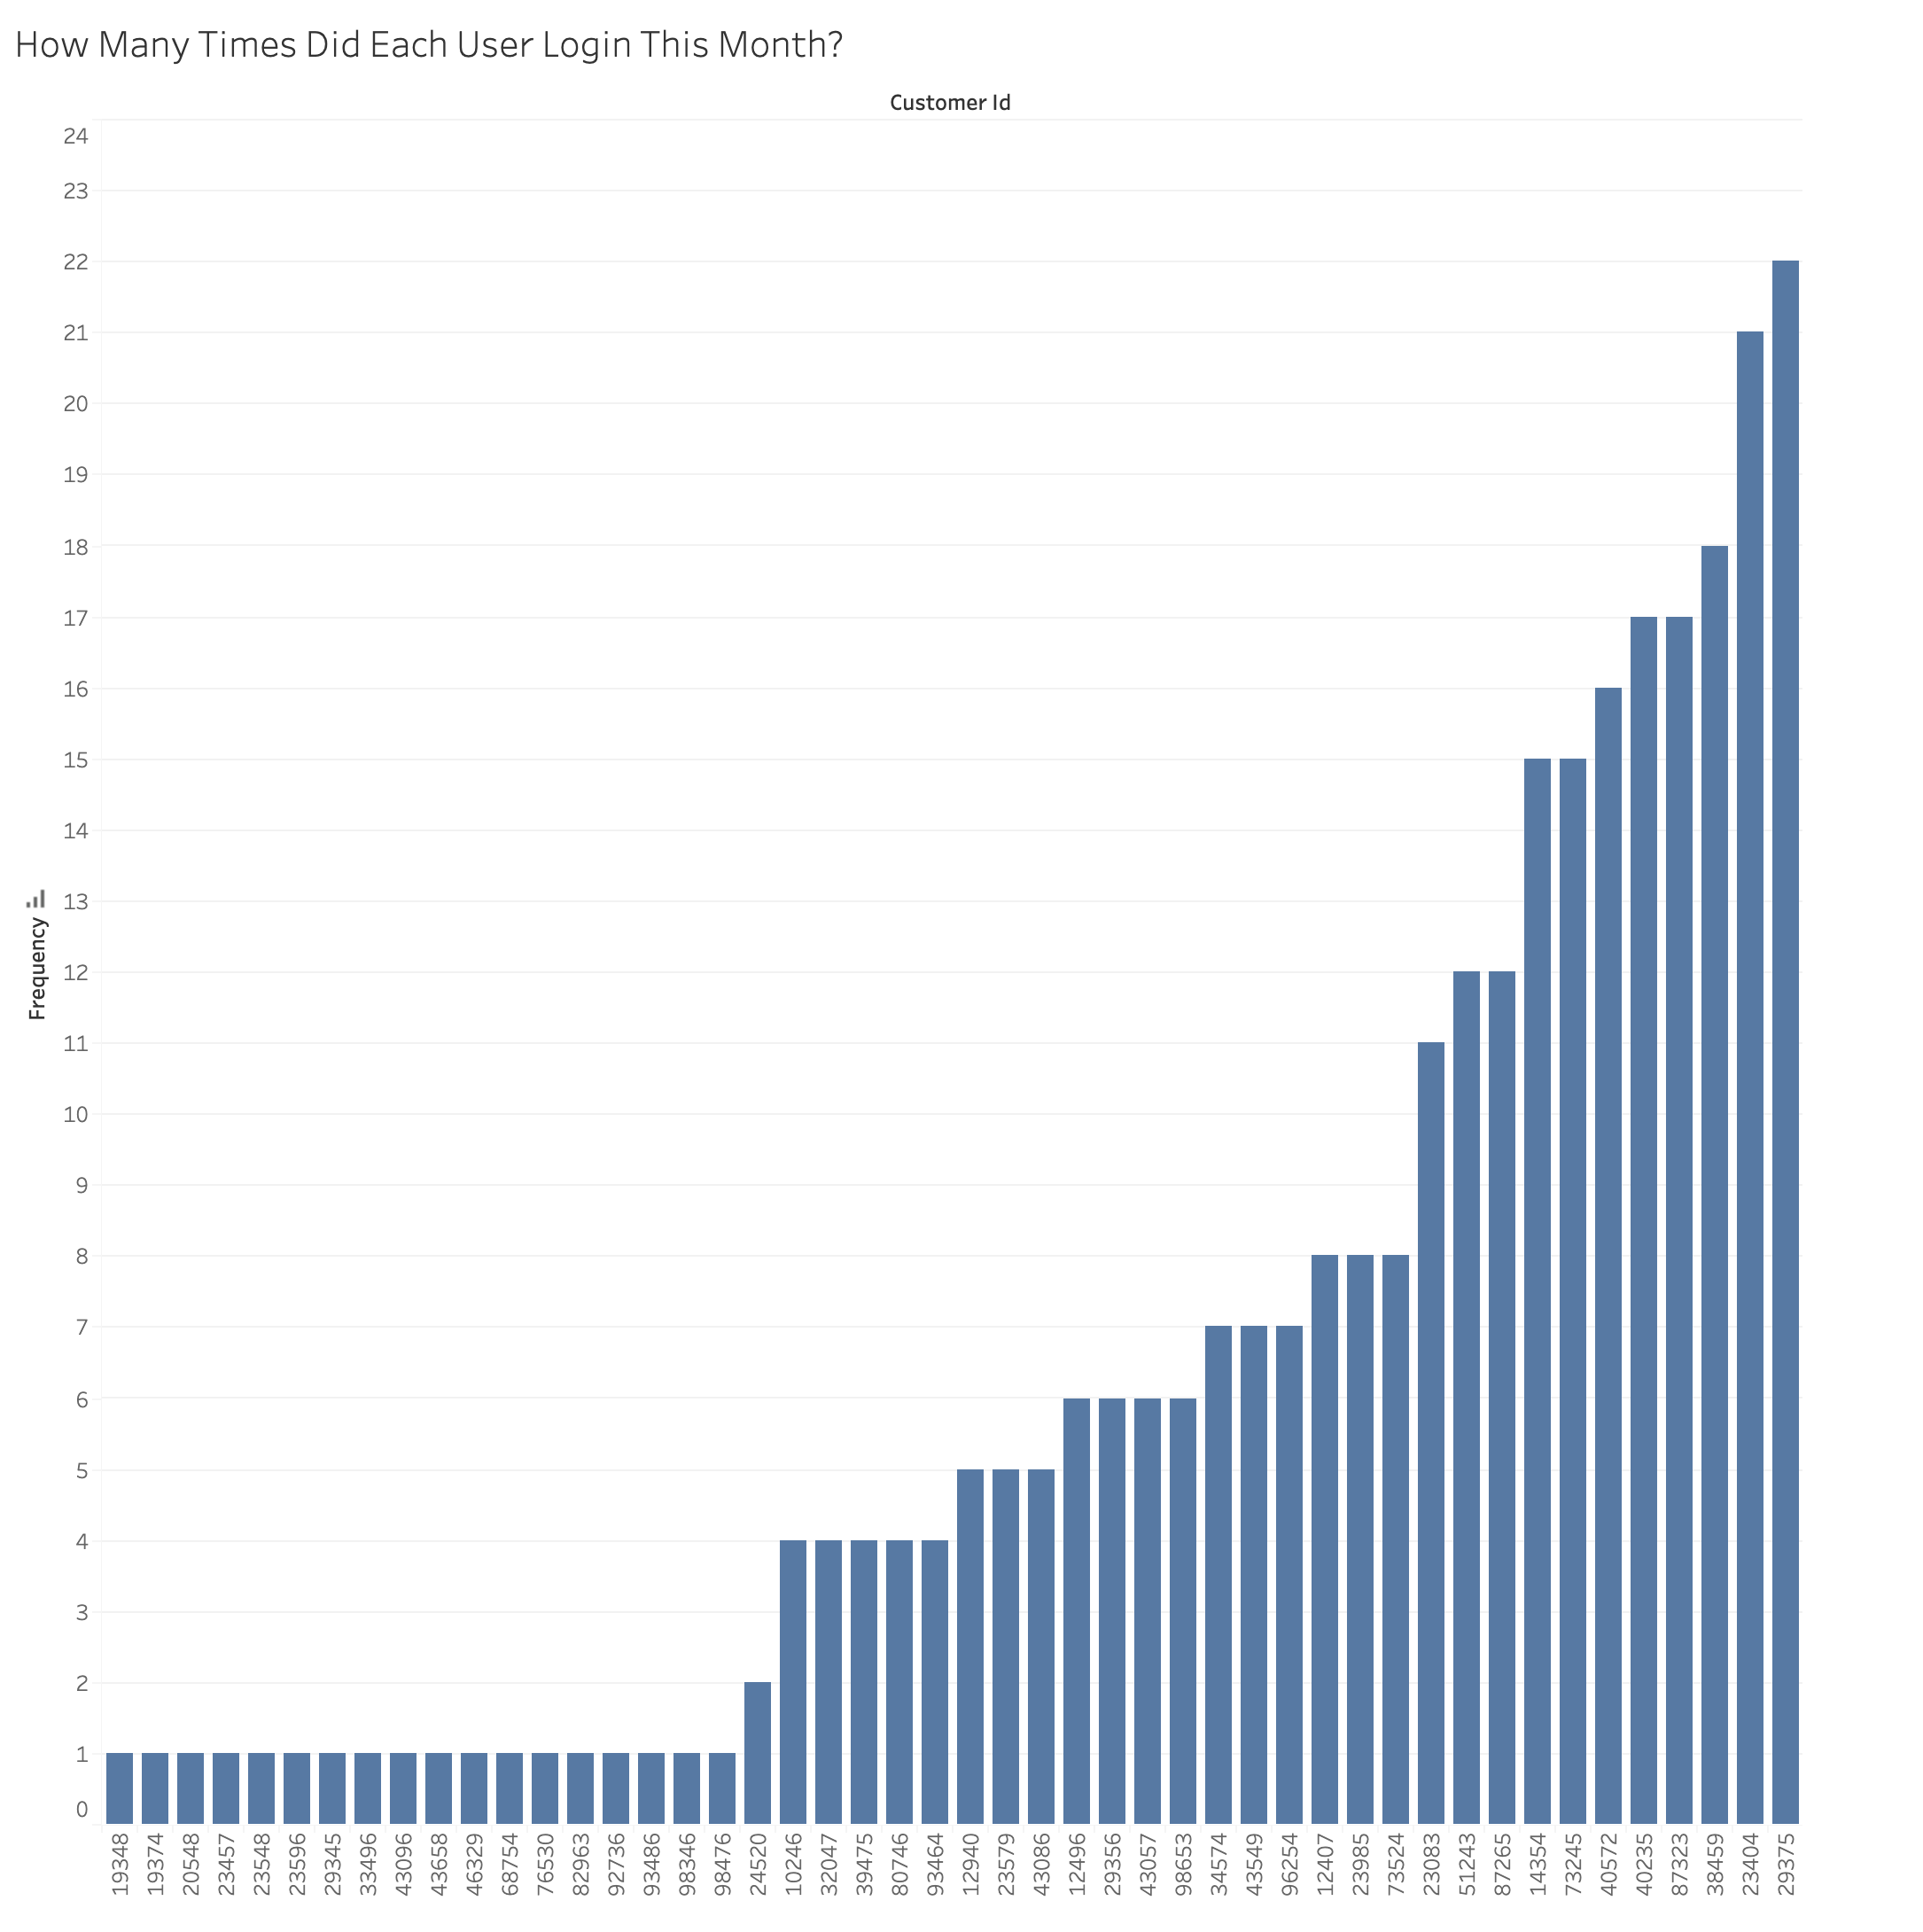

In [274]:
from IPython.display import Image
Image("tab4.png")

#### The user with the most logins, #29375, logged in on 22 different dates.

In [159]:
data[data['customer_id'] == 29375]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
7,823895.0,29375.0,10/30/19,False,False,True,True,False,0.0,0.0,5.0,2474.0,0.0,1875.0
28,440820.0,29375.0,10/27/19,False,False,True,True,False,0.0,0.0,2.0,639.0,0.0,1173.0
79,51859.0,29375.0,10/22/19,False,True,True,True,True,0.0,23.0,1.0,1121.0,5.0,1956.0
104,243101.0,29375.0,10/20/19,False,False,False,True,True,0.0,0.0,0.0,1109.0,4.0,1115.0
119,359949.0,29375.0,10/19/19,False,False,True,True,True,0.0,0.0,3.0,441.0,4.0,1844.0
141,338681.0,29375.0,10/17/19,True,True,True,False,True,1.0,17.0,4.0,0.0,2.0,808.0
152,667092.0,29375.0,10/15/19,True,True,True,True,False,1.0,22.0,3.0,16.0,0.0,1127.0
163,820853.0,29375.0,10/13/19,True,False,True,False,False,1.0,0.0,3.0,0.0,0.0,1115.0
170,574792.0,29375.0,10/13/19,True,True,True,True,True,1.0,16.0,4.0,220.0,2.0,2333.0
175,854618.0,29375.0,10/12/19,True,False,True,True,True,1.0,0.0,3.0,1640.0,3.0,259.0


#### Let's look at some of this individual's stats

In [155]:
print('Session Duration:')
print(data[data['customer_id'] == 29375]['session_duration'].describe())
print()
print('Session Comments Given:')
print(data[data['customer_id'] == 29375]['session_comments_given'].describe())
print()
print('Session Likes Given:')
print(data[data['customer_id'] == 29375]['session_likes_given'].describe())
print()
print('Session Projects Added:')
print(data[data['customer_id'] == 29375]['session_projects_added'].describe())

Session Duration:
count      22.000000
mean     1379.818182
std       630.941597
min       259.000000
25%      1035.500000
50%      1224.000000
75%      1878.000000
max      2333.000000
Name: session_duration, dtype: float64

Session Comments Given:
count    22.000000
mean      2.000000
std       1.543033
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: session_comments_given, dtype: float64

Session Likes Given:
count    22.000000
mean      8.590909
std       9.649372
min       0.000000
25%       0.000000
50%       4.500000
75%      16.750000
max      26.000000
Name: session_likes_given, dtype: float64

Session Projects Added:
count    22.000000
mean      0.909091
std       0.971454
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: session_projects_added, dtype: float64


#### How do these compare to the overall averages with all users?

In [156]:
print('Session Duration:')
print(data['session_duration'].describe())
print()
print('Session Comments Given:')
print(data['session_comments_given'].describe())
print()
print('Session Likes Given:')
print(data['session_likes_given'].describe())
print()
print('Session Projects Added:')
print(data['session_projects_added'].describe())

Session Duration:
count     300.000000
mean     1186.763333
std       688.632138
min        10.000000
25%       611.250000
50%      1152.000000
75%      1778.000000
max      2395.000000
Name: session_duration, dtype: float64

Session Comments Given:
count    300.000000
mean       2.406667
std        2.247545
min        0.000000
25%        0.750000
50%        2.000000
75%        4.000000
max       21.000000
Name: session_comments_given, dtype: float64

Session Likes Given:
count    300.000000
mean      10.423333
std        9.478234
min        0.000000
25%        0.000000
50%        9.000000
75%       19.000000
max       27.000000
Name: session_likes_given, dtype: float64

Session Projects Added:
count    300.000000
mean       1.620000
std        1.334743
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: session_projects_added, dtype: float64


#### So there doesn't seem to be $\textit{too}$ much of a difference.

#### Did the users who logged in the most also spend the most time on the site? Let's overlay each user's total $\textit{duration}$ on top of the previous graph, which gave each user's login frequency.

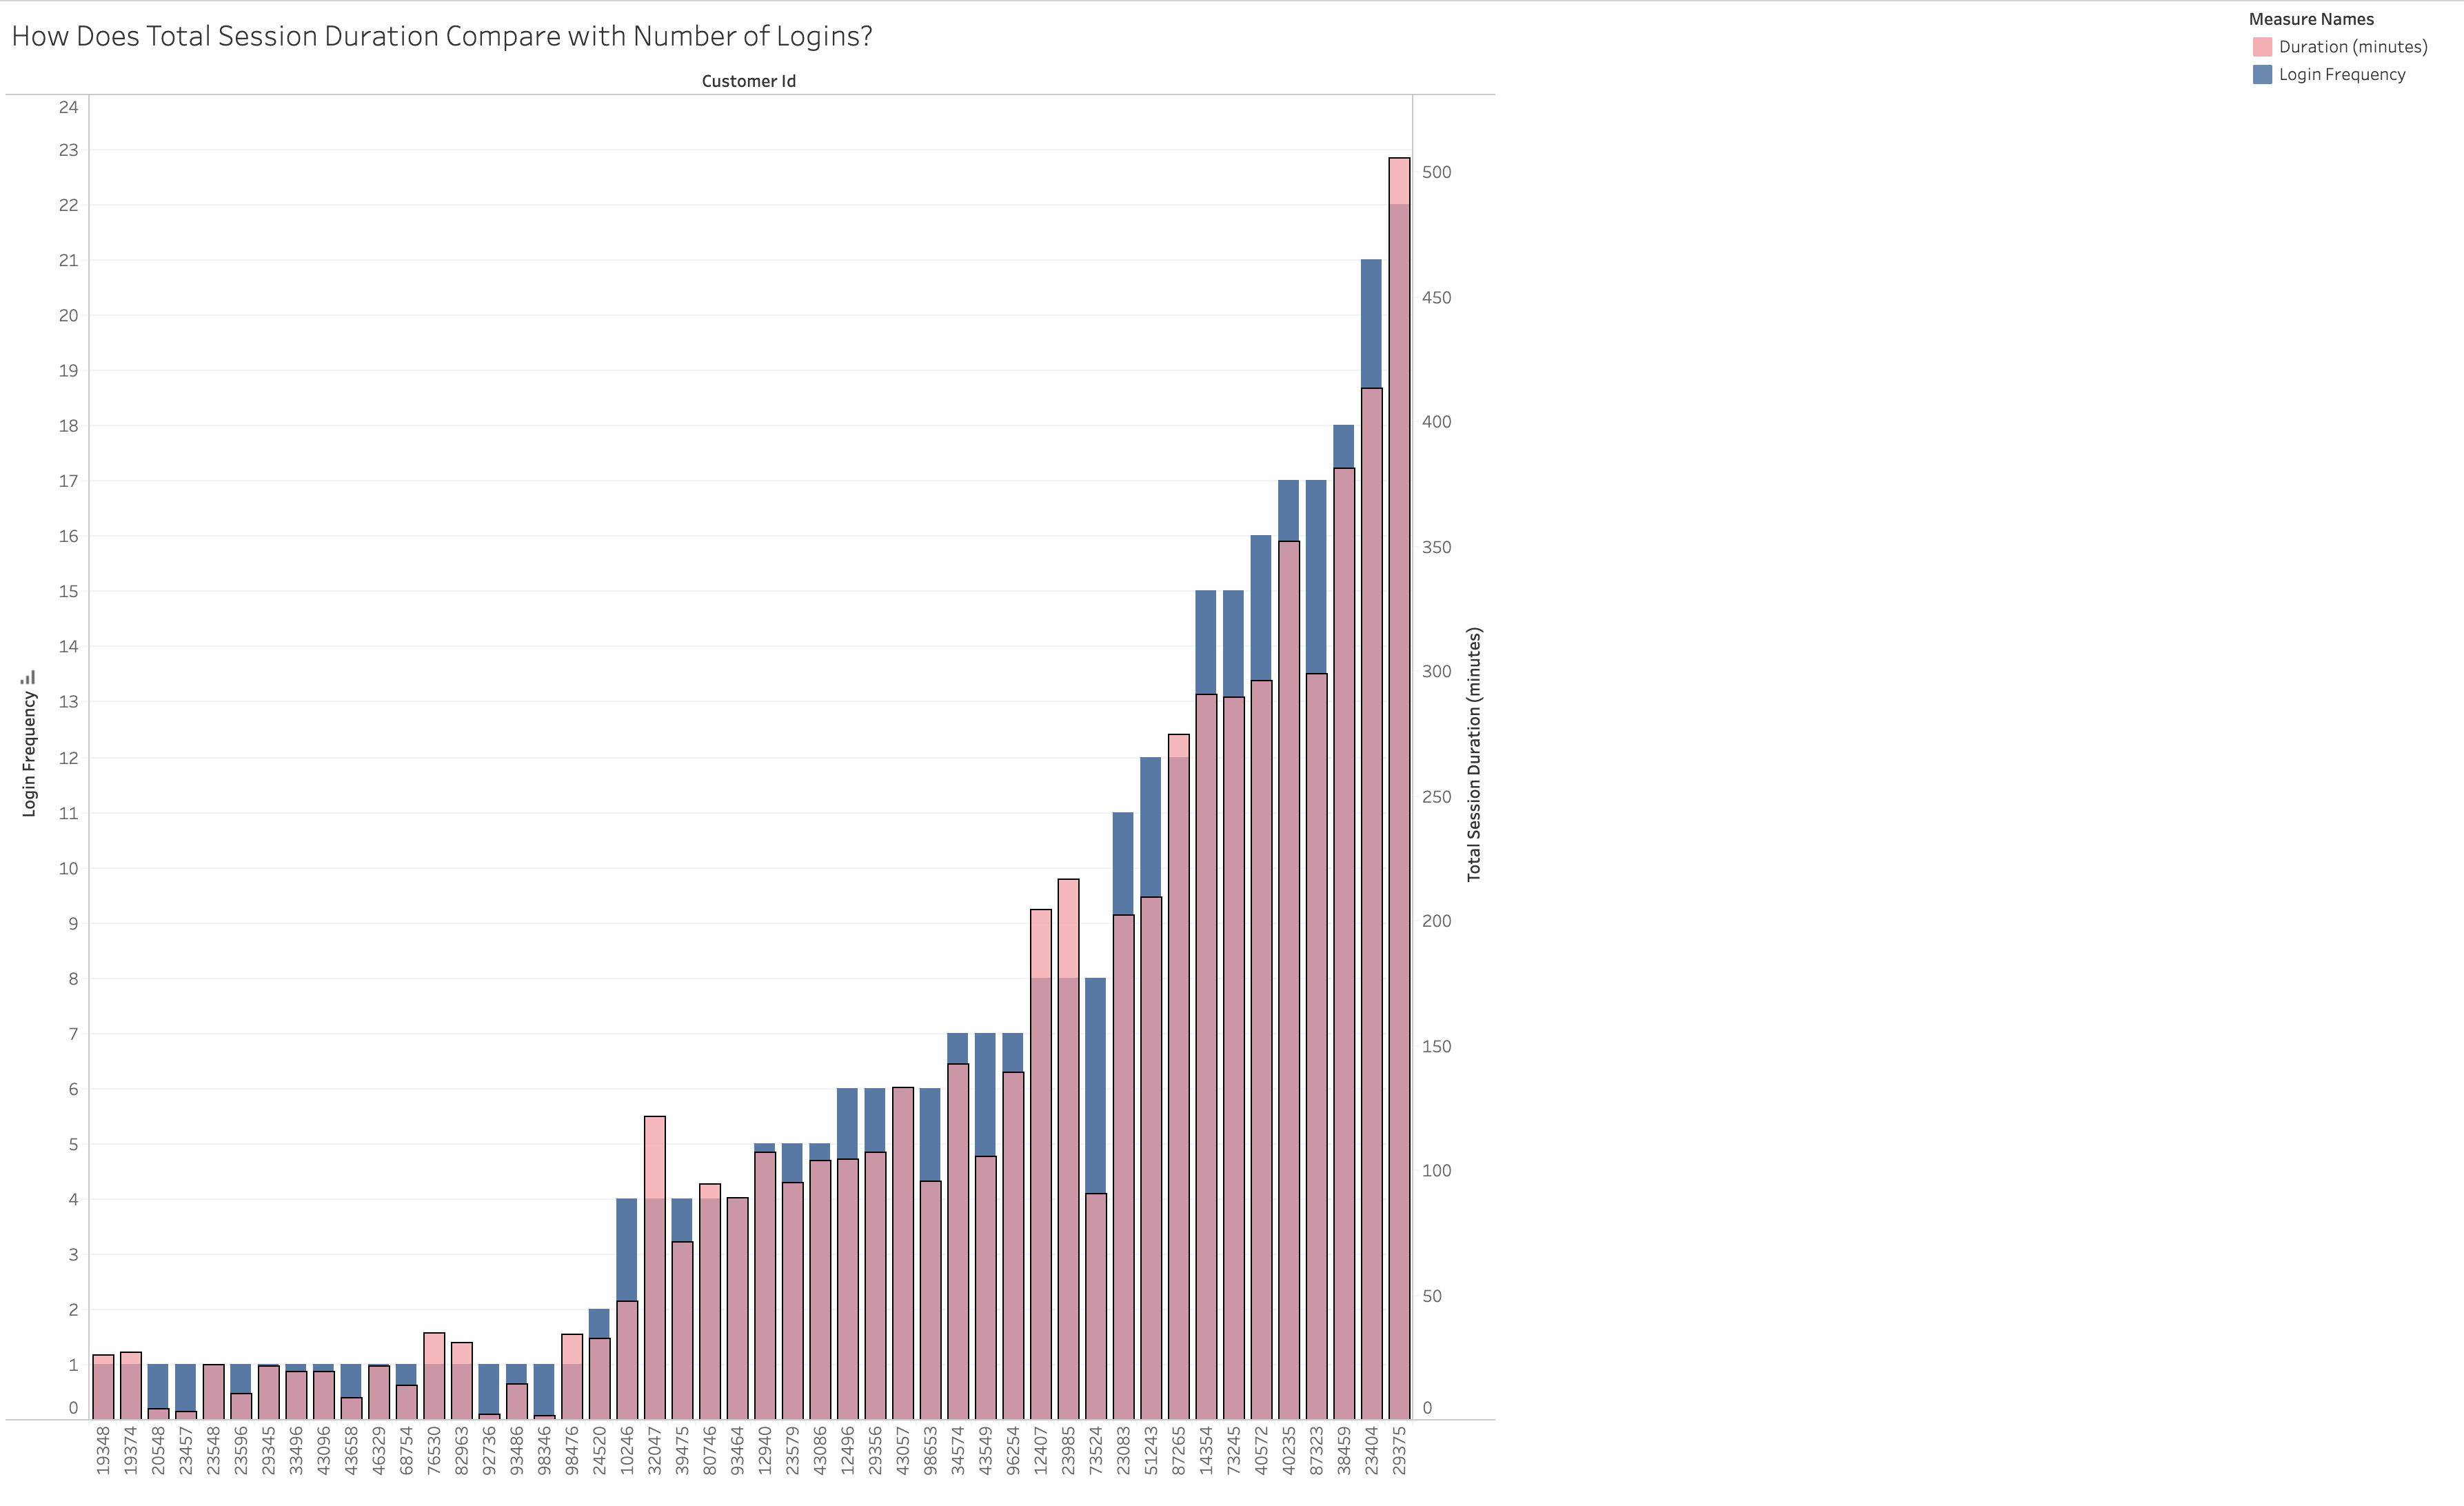

In [275]:
from IPython.display import Image
Image("tab5.png")

#### In general, the more times a user logged on, the higher their total session duration. An obvious anomoly is user #73524, who logged on 8 times in October, but who's total time was similar to that of a user who only logged on 4 or 5 times.

# Part III: High Engagement vs. Low Engagement
#### For this final part of the report, we will analyze differences between users who are highly engaged and users who have very low engagement. For the purposes of this report, we will define Low Engagement Users (LEU) as users who logged on 4 or fewer times in October and Highly Engaged Users (HEU) as users who logged in 15 or more times in October. Note, these definitions are subjective. 

In [194]:
LEU_data = data.copy()
HEU_data = data.copy()

HEU = (data['customer_id'].value_counts() >= 15)
LEU = (data['customer_id'].value_counts() <= 4)

for i in range(len(data)):
    if not HEU[data['customer_id'][i]]:
        HEU_data = HEU_data.drop(i)
    
    if not LEU[data['customer_id'][i]]:
        LEU_data = LEU_data.drop(i)
        

#### Let's look at some descriptive statistics between these two groups

In [200]:
#High Engagement Users
print('Session Duration Average:')
print(HEU_data['session_duration'].mean())
print('Session Duration Median:')
print(HEU_data['session_duration'].median())
print()
print('Session Comments Given Average:')
print(HEU_data['session_comments_given'].mean())
print('Session Comments Given Median:')
print(HEU_data['session_comments_given'].median())
print()
print('Session Likes Given Average:')
print(HEU_data['session_likes_given'].mean())
print('Session Likes Given Median:')
print(HEU_data['session_likes_given'].median())
print()
print('Session Projects Added Average:')
print(HEU_data['session_projects_added'].mean())
print('Session Projects Added Median:')
print(HEU_data['session_projects_added'].median())
print()
print('Bugs in Session Average:')
print(HEU_data['bugs_in_session'].mean())
print('Bugs in Session Median:')
print(HEU_data['bugs_in_session'].median())

Session Duration Average:
1203.5531914893618
Session Duration Median:
1157.0

Session Comments Given Average:
2.4539007092198584
Session Comments Given Median:
2.0

Session Likes Given Average:
10.24113475177305
Session Likes Given Median:
9.0

Session Projects Added Average:
1.5106382978723405
Session Projects Added Median:
1.0

Bugs in Session Average:
1.2907801418439717
Bugs in Session Median:
0.0


In [201]:
#Low Engagement Users
print('Session Duration Average:')
print(LEU_data['session_duration'].mean())
print('Session Duration Median:')
print(LEU_data['session_duration'].median())
print()
print('Session Comments Given Average:')
print(LEU_data['session_comments_given'].mean())
print('Session Comments Given Median:')
print(LEU_data['session_comments_given'].median())
print()
print('Session Likes Given Average:')
print(LEU_data['session_likes_given'].mean())
print('Session Likes Given Median:')
print(LEU_data['session_likes_given'].median())
print()
print('Session Projects Added Average:')
print(LEU_data['session_projects_added'].mean())
print('Session Projects Added Median:')
print(LEU_data['session_projects_added'].median())
print()
print('Bugs in Session Average:')
print(LEU_data['bugs_in_session'].mean())
print('Bugs in Session Median:')
print(LEU_data['bugs_in_session'].median())

Session Duration Average:
1160.125
Session Duration Median:
1173.5

Session Comments Given Average:
2.1
Session Comments Given Median:
2.0

Session Likes Given Average:
9.95
Session Likes Given Median:
7.0

Session Projects Added Average:
1.725
Session Projects Added Median:
2.0

Bugs in Session Average:
1.35
Bugs in Session Median:
0.0


#### Let's plot this data to get a better visual comparison

In [253]:
to_plot = pd.DataFrame(index = list(range(20)),columns = ['User Type', 'Data Type', 'Value', 'Measure']) 


to_plot.loc[0] = ['LEU', 'Session Duration (minutes)', LEU_data['session_duration'].mean()/60, 'Average']
to_plot.loc[1] = ['LEU', 'Session Comments Given', LEU_data['session_comments_given'].mean(), 'Average']
to_plot.loc[2] = ['LEU', 'Session Likes Given', LEU_data['session_likes_given'].mean(), 'Average']       
to_plot.loc[3] = ['LEU', 'Session Projects Added', LEU_data['session_projects_added'].mean(), 'Average']  
to_plot.loc[4] = ['LEU', 'Bugs in Session', LEU_data['bugs_in_session'].mean(), 'Average']  

to_plot.loc[5] = ['HEU', 'Session Duration (minutes)', HEU_data['session_duration'].mean()/60, 'Average']
to_plot.loc[6] = ['HEU', 'Session Comments Given', HEU_data['session_comments_given'].mean(), 'Average']
to_plot.loc[7] = ['HEU', 'Session Likes Given', HEU_data['session_likes_given'].mean(), 'Average']       
to_plot.loc[8] = ['HEU', 'Session Projects Added', HEU_data['session_projects_added'].mean(), 'Average']  
to_plot.loc[9] = ['HEU', 'Bugs in Session', HEU_data['bugs_in_session'].mean(), 'Average']  

to_plot.loc[10] = ['LEU', 'Session Duration (minutes)', LEU_data['session_duration'].median()/60, 'Median']
to_plot.loc[11] = ['LEU', 'Session Comments Given', LEU_data['session_comments_given'].median(), 'Median']
to_plot.loc[12] = ['LEU', 'Session Likes Given', LEU_data['session_likes_given'].median(), 'Median']       
to_plot.loc[13] = ['LEU', 'Session Projects Added', LEU_data['session_projects_added'].median(), 'Median']  
to_plot.loc[14] = ['LEU', 'Bugs in Session', LEU_data['bugs_in_session'].median(), 'Median']  

to_plot.loc[15] = ['HEU', 'Session Duration (minutes)', HEU_data['session_duration'].median()/60, 'Median']
to_plot.loc[16] = ['HEU', 'Session Comments Given', HEU_data['session_comments_given'].median(), 'Median']
to_plot.loc[17] = ['HEU', 'Session Likes Given', HEU_data['session_likes_given'].median(), 'Median']       
to_plot.loc[18] = ['HEU', 'Session Projects Added', HEU_data['session_projects_added'].median(), 'Median']  
to_plot.loc[19] = ['HEU', 'Bugs in Session', HEU_data['bugs_in_session'].median(), 'Median']  
                  

#### For ease, we will use seaborn to generate this plot

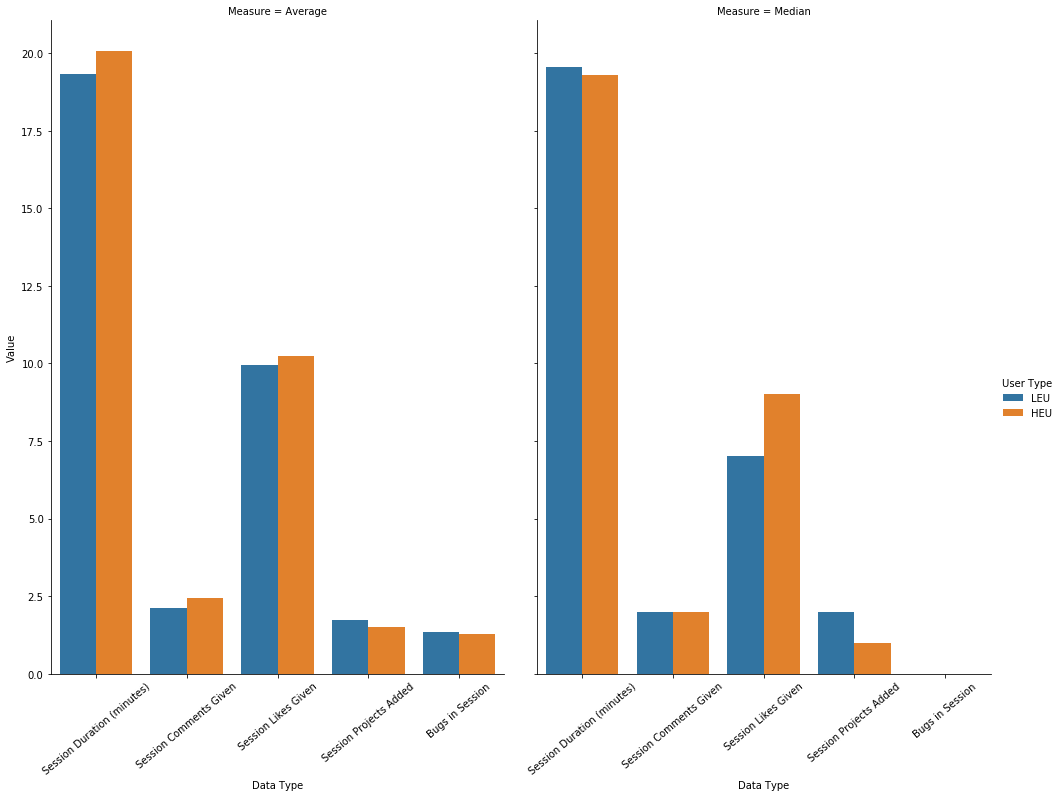

In [258]:
import seaborn as sns

g = sns.catplot(x="Data Type", y="Value",
                hue="User Type", col="Measure",
                data=to_plot, kind="bar",
                height=10, aspect=.7)
g.set_xticklabels(rotation=40);

#### Surprisingly, we don't see too much difference in the data from the LEUs and HEUs. This seems to indicate to me that, although LEUs are logging on less regularly, they are still actively commenting, liking posts, and adding projects, which leads me to think that the number of logins per month is $not$ the best way to measure engagement. Certainly, we want users to log in more than once per month, but it is definitely a good thing that even those users who are only logging in once per month are still commenting, liking, and adding projects. 

### Hopefully, I was able to provide some helpful insight into the User Engagement data. I indicated some areas that may warrant further investigation (such as the session bugs or the collection of session duration data). I was hoping to find some significant differences between the LEUs and HEUs, as that would potentially aid in figuring out how to turn LEUs into HEUs. Even though my specific analysis did not find any, certainly there may be some critical indicators that separate the two (that could be found in this data or in other data). I also acknowledge that I did not use the inactive_duration data in this specific analysis, although it may be useful for future analysis.

### Where to go from here? My next step would be to perform a similar analysis as in Part III, but redefining LEU and HEU. Instead of defining engagement as the number of times a user logged on per month, I could define engagement as the total number of likes and comments, or the number of projects added. Defining engagement in this way, we may see a greater contrast between LEUs and HEUs.